In [1]:
# Import necessary packages
import pandas as pd 
import os
from helper_functions import date_to_decimal_year, rain_predictor
from plot_functions import eruption_counter, annual_plotter, bar_plotter, by_strength
from el_nino_functions import elnino_strengths
import numpy as np

In [2]:
# Create path to data
folder_env_variable = 'MY_FOLDER_PATH'
default_folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

folder_path = os.environ.get(folder_env_variable, default_folder_path)

In [8]:
# Import tables
volcanic_events = pd.read_csv(os.path.join(folder_path, "erupt_all.csv"))
rainfall = pd.read_csv(os.path.join(folder_path, "cleaned_precip_galap.csv"))

bellavista = pd.read_csv(os.path.join(folder_path, "climate_bellavista.csv"))
ayora = pd.read_csv(os.path.join(folder_path, "climate_puerto-ayora.csv"))

oni = pd.read_csv(os.path.join(folder_path, "oni.csv"))

In [9]:
volcanic_events['Decimal'] = volcanic_events['Start'].apply(lambda x: int(x[5:7]))
print(volcanic_events)

          Volcano       Start Max Explosivity  Decimal
0      Fernandina  1917-05-14               0        5
1      Fernandina  1905-04-09             NaN        4
2      Fernandina  1927-12-13               0       12
3      Fernandina  1937-03-01               0        3
4      Fernandina  1958-09-16               2        9
5      Fernandina  1961-03-21               2        3
6      Fernandina  1972-06-04               0        6
7            Wolf  1925-04-11               1        4
8            Wolf  1935-02-01             NaN        2
9            Wolf  1948-01-24               2        1
10           Wolf  1963-03-04               0        3
11    Azul, Cerro  1943-04-13               1        4
12    Azul, Cerro  1948-06-30               0        6
13    Azul, Cerro  1951-07-02             NaN        7
14    Azul, Cerro  1959-06-29               2        6
15  Negra, Sierra  1911-12-31             NaN       12
16  Negra, Sierra  1948-08-19               2        8
17  Negra,

In [11]:
volcanic_events = volcanic_events[volcanic_events['Start'] > '1965']

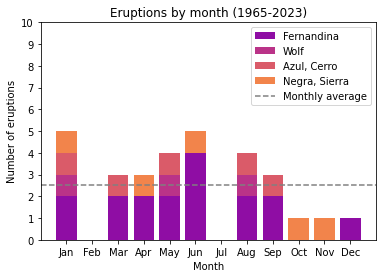

In [13]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Fernandina', 'Wolf', 'Azul, Cerro', 'Negra, Sierra']
values = [[((volcanic_events['Volcano'] == i) & (volcanic_events['Decimal'] == j)).sum() for i in categories] for j in range(1,13)] 

# Initialize legend labels and handles
legend_labels = []
handles = []

all = np.sum(values)

# Define colors for each segment of the bars
colors = [plt.cm.plasma(i) for i in np.linspace(0.3, 0.7, 4)]

# Plot
fig, ax = plt.subplots()

# Iterate through each set of values
for i in range(len(values)):
    # Initialize the bottom position of the bar segments
    bottom = 0
    # Iterate through each segment value in the bar
    for j in range(len(categories)):
        # Plot each segment of the bar
        bar = ax.bar(i, values[i][j], bottom=bottom, color=colors[j])
        # Update the bottom position for the next segment
        bottom += values[i][j]
        # Add legend labels and handles only if not already added
        if categories[j] not in legend_labels:
            handles.append(bar)
            legend_labels.append(categories[j])
            
line = ax.axhline(y=(all/12), color='gray', linestyle='--')
handles.append(line)
legend_labels.append('Monthly average')

ax.set_title('Eruptions by month (1965-2023)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of eruptions')

# Set x-axis ticks and labels
ax.set_xticks(range(len(values)), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_yticks(range(11))

# Add legend
ax.legend(handles, legend_labels)

# Show plot
plt.show()
